In [ ]:
!pip install -U cohere

In [ ]:
#@title Enable text wrapping in Google Colab

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

Load your API key obtained from Cohere

In [ ]:
from google.colab import userdata
cohere_key = userdata.get('cohere_key')

Create the client using the API key

In [ ]:
import cohere

co = cohere.Client(cohere_key)


## Text Embeddings

In [ ]:
# get the embeddings
phrases = ["i love soup", "soup is my favorite", "london is far away"]

model="embed-english-v3.0"
input_type="search_query"

res = co.embed(texts=phrases,
                model=model,
                input_type=input_type,
                embedding_types=['float'])

(soup1, soup2, london) = res.embeddings.float

# compare them
def calculate_similarity(a, b):
  return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

print(calculate_similarity(soup1, soup2)) # 0.85 - very similar!
print(calculate_similarity(soup1, london)) # 0.16 - not similar!

0.847041073600984
0.16478914232077158


In [ ]:
response = co.embed(
  model='embed-english-v3.0',
  texts=["NATO Parliamentary Assembly declares Russia to be a ‘terrorist state’",
         "Fifa and Qatar in urgent talks after Wales rainbow hats confiscated | Fifa and the Qataris were in talks on the matter on Tuesday, where Fifa reminded their hosts of their assurances before the tournament that everyone was welcome and rainbow flags would be allowed.", "Qatar Bans Beer Sales at World Cup Stadiums", "Biden calls \'emergency\' meeting after missile hits Poland", "Germany to force plastic makers to help pay for cleanups", "President Zelensky: Today is a historic day, we are regaining Kherson", "Ukraine suffered a comms outage when 1,300 SpaceX satellite units went offline over funding issues", "Protests against Xi and his zero covid policy broke out in Shanghai and other cities in China", "Vladimir Putin\'s black belt revoked by international taekwondo organization", "Queen Elizabeth II has died, Buckingham Palace announces", "Macron wins French presidential election", "Greenland permanently bans all oil and gas exploration", "Climate activists fill golf holes with cement after water ban exemption", "“Harshest Sanctions Ever,” EU to Freeze Russian Assets and Stop Russian Bank Access to EU Markets", "Boris Johnson to resign as prime minister", "Shell consultant quits, says company causes ‘extreme harm’ to planet", "Spain makes it a crime for pro-lifers to harrass women outside abortion clinics", "Canada to Ban Foreigners From Buying Homes as Prices Soar", "News that the world\'s first commercial octopus farm is closer to becoming reality has been met with dismay by scientists and conservationists. They argue such intelligent \"sentient\" creatures - considered able to feel pain and emotions - should never be commercially reared for food.", "Shinzo Abe, former Japanese prime minister, dies after being shot while giving speech, state broadcaster says", "Liz Truss to resign as Prime Minister", "UK: Russia needs to be isolated ‘completely, diplomatically and financially’", "Best approach to buying a new mattress?", "Almost half of Gen Z and millennials living paycheque-to-paycheque, global survey finds", "Housing is never going to get any better.", "Are you not annoyed that taxes are not built into price tags in Canada?", "What is one thing that you consider to be an absolute waste of money?", "Non-sufficient funds (NSF) fees are ludicrous and our government should have outlawed them years ago.", "Why does anyone do food delivery?", "My mom (60F) is still pressuring me (25F)to add me as a third person on her new $820k mortgage. I really don’t want to as my husband and I are looking to buy our own home. She states doing this will build my credit for a new mortgage down the line", "Bank of Canada increases policy interest rate by 75 basis points, continues quantitative tightening", "Bragging about RESP", "The only person benefitting from you not discussing your wage with co-workers is your employer!", "It\'s genuinely shocking to see how many people misunderstand income tax brackets", "I (30F) caught my husband (31M) in an affair and I don’t know how to move forward.", "I\'m [28F] unsure if it\'s time to draw boundaries with my boyfriend [28M] and his coworker [late 20sF] who he got close to very quickly", "Me [36 M] married to my Wife [36 F] 11 years, and I can\'t stop thinking about a girl I dated for 1 month 16 years ago.", "My (28F) colleague (30F) didn\'t invite me to her wedding, and it\'s completely unravelled our friendship", "My [26 F] with my husband [29 M] 1 year, he has been diagnosed with terminal cancer, how to make it count?", "Husband and I are having our longest fight ever and I don\'t know what to do", "I (26F) want to propose to my boyfriend (25M) but just found out he plans to propose as well", "My (30F) husband (32M) impulse bought a dog.", "I [29F] am traveling overseas to meet my online \"boyfriend\" [38M] in a week. He just said he had to cancel", "My wife [28F] found out that my mother [59F] and I [28M] have been lying to her about our (me and my wife\'s) baby [0M] for months", "United Airlines stock down over 5% premarket trading", "Bitcoin was nearly $20,000 a year ago today", "If in 2001, you bought $399 of Apple stock instead of buying the original iPod, today that stock would be worth ~$62,000.", "Historically it\'s way better to invest at market close than at market open, most gains occur overnight", "Jim Cramer Gave an Interview in 2006 on how the Hedge Funds Manipulate the Markets", "Uber Fined $649 Million for Saying Drivers Aren’t Employees", "TIL if you had bought EA stock after they were voted \"The Worst Company in America\" your investment would be up by more than 378% today", "Long Island Ice Tea Corp, a beverage company, was up 500% premarket today after changing its name to Long Blockchain Corp, despite having no relation to blockchain in its business", "By popular demand: official “I hate Robinhood and want a new broker thread”", "Gamestop Big Picture: The Short Singularity Pt 3 - WTF edition", "PSA: There\'s an extremely high quality MIT Finance course on Youtube by Andrew Lo, filmed during the height of the subprime mortgage crisis"],
  input_type='clustering'
)

print('Embeddings: {}'.format(response.embeddings))

Embeddings: [[0.026550293, 0.03768921, -0.009483337, -0.007972717, 0.052246094, -0.00027608871, 0.00070858, -0.076171875, 0.0035858154, -0.02494812, -0.027832031, -0.0033168793, -0.030944824, -0.044799805, 0.022369385, -0.019104004, 0.011619568, -0.013244629, 0.022018433, -0.00086688995, 0.0073165894, -0.008262634, 0.015899658, -0.022613525, 0.015655518, 0.011756897, -0.029708862, -0.019699097, -0.042236328, -0.05291748, -0.015655518, 0.0859375, 0.042022705, -0.0023097992, -0.07525635, -0.045135498, -0.040130615, 0.010246277, -0.012237549, 0.010498047, 0.024536133, -0.014846802, 0.01235199, -0.013633728, -0.0005903244, -0.010978699, -0.0074653625, -0.04043579, 0.026565552, 0.0107040405, -0.0004582405, 0.027511597, -0.041107178, 0.042114258, -0.002111435, -0.013412476, -0.07525635, 0.007873535, -0.0020980835, 0.09649658, 0.036499023, 0.0423584, -0.03152466, -0.052124023, -0.010955811, -0.008148193, 0.056274414, 0.024459839, 0.06665039, -0.01576233, -0.03414917, 0.051605225, 0.022064209,

In [ ]:
len(response.embeddings)

55

In [ ]:
len(response.embeddings[0])

1024

In [ ]:
import numpy as np

embeddings = np.array(response.embeddings)

# Get the embedding of the first sentence
first_sentence_embedding = embeddings[0]

# Compute dot product similarity between the first sentence and all other sentences
similarity_scores = np.dot(embeddings, first_sentence_embedding)

# Get the indices of the top 3 most similar sentences
top_indices = np.argsort(similarity_scores)[-4:-1][::-1]  # Exclude the first one since it's the same sentence

# Get the top 3 similar sentences and their scores
top_sentences = embeddings[top_indices]
top_scores = similarity_scores[top_indices]

print(response.texts[0])

for i, (idx, score) in enumerate(zip(top_indices, top_scores)):
    print(f"Top {i+1} similar sentence index: {response.texts[idx]}, Similarity score: {score}")

nato parliamentary assembly declares russia to be a ‘ terrorist state ’
Top 1 similar sentence index: uk : russia needs to be isolated ‘ completely, diplomatically and financially ’, Similarity score: 0.5562300853976059
Top 2 similar sentence index: “ harshest sanctions ever, ” eu to freeze russian assets and stop russian bank access to eu markets, Similarity score: 0.555218040367853
Top 3 similar sentence index: biden calls ' emergency ' meeting after missile hits poland, Similarity score: 0.455124445245425


## Clustering

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


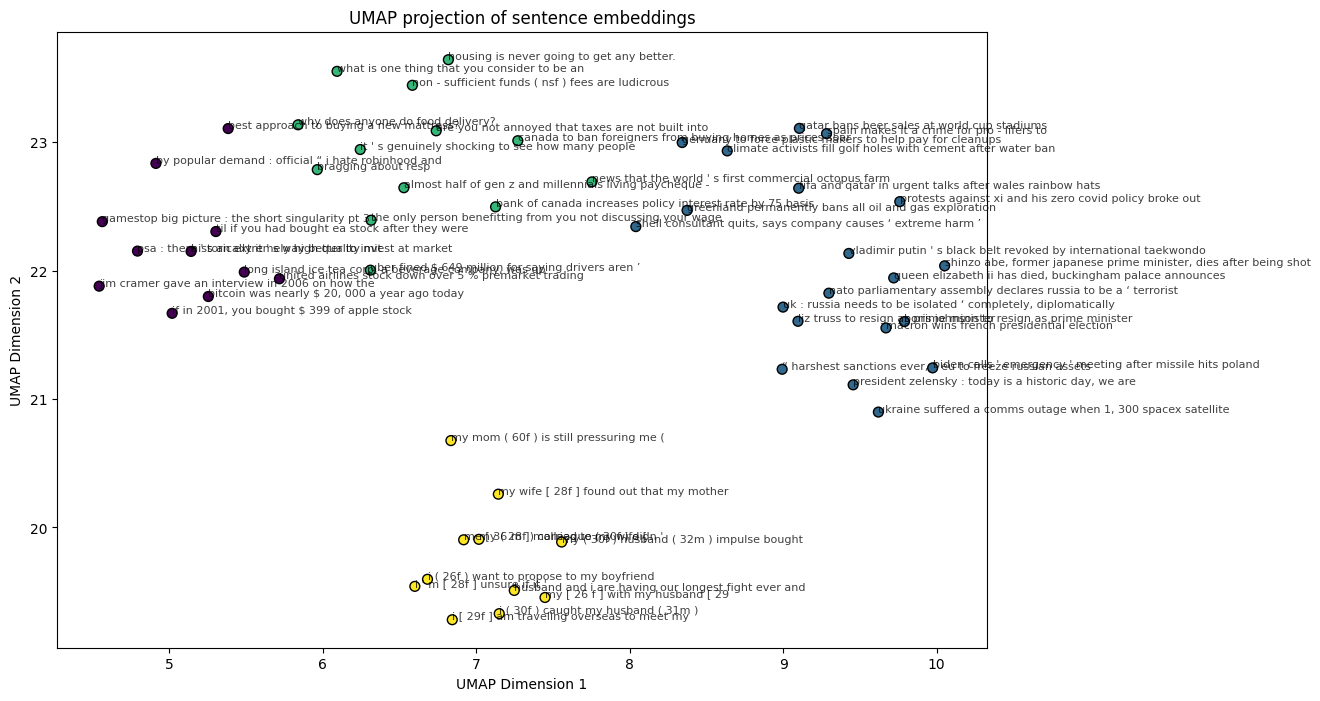

In [ ]:
import umap
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Reduce dimensionality with UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
embedding_2d = reducer.fit_transform(embeddings)

# Apply KMeans clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(embedding_2d)


# Prepare the first 10 words for each sentence as labels
def get_first_10words(sentence):
    return ' '.join(sentence.split()[:10])

labels = [get_first_10words(sentence) for sentence in response.texts]


# Plot the UMAP embeddings
plt.figure(figsize=(12, 8))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=cluster_labels, edgecolor='k', s=50)

# Annotate points with the first 10 words of each sentence
for i, label in enumerate(labels):
    plt.annotate(label, (embedding_2d[i, 0], embedding_2d[i, 1]), fontsize=8, alpha=0.75)

plt.title('UMAP projection of sentence embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

In [ ]:
from cohere import ClassifyExample

examples=[
  ClassifyExample(text="The order came 5 days early", label="positive review"),
  ClassifyExample(text="The item exceeded my expectations", label="positive review"),
  ClassifyExample(text="I ordered more for my friends", label="positive review"),
  ClassifyExample(text="I would buy this again", label="positive review"),
  ClassifyExample(text="I would recommend this to others", label="positive review"),
  ClassifyExample(text="The package was damaged", label="negative review"),
  ClassifyExample(text="The order is 5 days late", label="negative review"),
  ClassifyExample(text="The order was incorrect", label="negative review"),
  ClassifyExample(text="I want to return my item", label="negative review"),
  ClassifyExample(text="The item's material feels low quality", label="negative review"),
  ClassifyExample(text="The product was okay", label="neutral review"),
  ClassifyExample(text="I received five items in total", label="neutral review"),
  ClassifyExample(text="I bought it from the website", label="neutral review"),
  ClassifyExample(text="I used the product this morning", label="neutral review"),
  ClassifyExample(text="The product arrived yesterday", label="neutral review")
]
inputs=[
  "This item was broken when it arrived",
  "The product is amazing",
  "The product was not too bad"
]

response = co.classify(
  inputs=inputs,
  examples=examples,
)
print(response)

id='13b28af1-b6fd-4800-9b41-e4021be48311' classifications=[ClassifyResponseClassificationsItem(id='8f2be9ef-fe23-40d6-838e-dc9446ad4769', input='This item was broken when it arrived', prediction='negative review', predictions=['negative review'], confidence=0.98535657, confidences=[0.98535657], labels={'negative review': ClassifyResponseClassificationsItemLabelsValue(confidence=0.98535657), 'neutral review': ClassifyResponseClassificationsItemLabelsValue(confidence=0.013544503), 'positive review': ClassifyResponseClassificationsItemLabelsValue(confidence=0.0010989254)}, classification_type='single-label'), ClassifyResponseClassificationsItem(id='b5119f1d-0db0-46f9-ae86-0c69b19d4148', input='The product is amazing', prediction='neutral review', predictions=['neutral review'], confidence=0.9019442, confidences=[0.9019442], labels={'negative review': ClassifyResponseClassificationsItemLabelsValue(confidence=0.0013575472), 'neutral review': ClassifyResponseClassificationsItemLabelsValue(co

In [ ]:
response

ClassifyResponse(id='13b28af1-b6fd-4800-9b41-e4021be48311', classifications=[ClassifyResponseClassificationsItem(id='8f2be9ef-fe23-40d6-838e-dc9446ad4769', input='This item was broken when it arrived', prediction='negative review', predictions=['negative review'], confidence=0.98535657, confidences=[0.98535657], labels={'negative review': ClassifyResponseClassificationsItemLabelsValue(confidence=0.98535657), 'neutral review': ClassifyResponseClassificationsItemLabelsValue(confidence=0.013544503), 'positive review': ClassifyResponseClassificationsItemLabelsValue(confidence=0.0010989254)}, classification_type='single-label'), ClassifyResponseClassificationsItem(id='b5119f1d-0db0-46f9-ae86-0c69b19d4148', input='The product is amazing', prediction='neutral review', predictions=['neutral review'], confidence=0.9019442, confidences=[0.9019442], labels={'negative review': ClassifyResponseClassificationsItemLabelsValue(confidence=0.0013575472), 'neutral review': ClassifyResponseClassifications

In [ ]:
for idx in range(len(response.classifications)):
  res = response.classifications[idx]
  print(res.input, res.predictions[0])

This item was broken when it arrived negative review
The product is amazing neutral review
The product was not too bad neutral review


## Text Generation

In [ ]:
response = co.chat(
  model="command-r-plus",
  message="Hello! Write a title for a course about LLM Tasks and Prompting."
)

print(response.text) # "The Art of API Design: Crafting Elegant and Powerful Interfaces"

Sure! Here is a suggested title for a course about LLM Tasks and Prompting: 

# Mastering Large Language Models: The Art of Task Design and Prompting 

This title emphasizes the practical and creative aspects of working with LLMs, focusing on the skills needed to design effective tasks and prompts to unlock the full potential of these models.


### Defining a System-level prompt (premable)

In [ ]:
response = co.chat(message="Write a title for a course about LLM Tasks and Prompting",
                   model="command-r-plus",
                   preamble="You are an expert in deep learning and LLM")
print(response.text)

Sure! Here is a potential title for a course about LLM Tasks and Prompting: 

**"The Comprehensive Guide to LLM Tasks and Prompting: Enhancing Performance and Versatility"** 

This title emphasizes the practical and applied nature of the course, focusing on enhancing the performance and versatility of LLMs through effective task design and prompting techniques. It also conveys a sense of depth and comprehensiveness, suggesting that the course will provide a detailed exploration of the topic.


### Streaming the Chatbot Response

In [ ]:
stream = co.chat_stream(message="Hello. I'd like to learn about techniques for effective prompt engineering",
                        model="command-r-plus",
                        preamble="You are an expert in deep learning and LLM")

for event in stream:
    if event.event_type == "text-generation":
        print(event.text, end='')

Prompt engineering is a crucial aspect of interacting with LLMs and involves providing prompts or instructions to guide the model's responses. Here are some techniques for effective prompt engineering:

1. **Clear and Concise Language**: Use simple and straightforward language that the LLM can easily understand. Avoid complex or ambiguous sentences that may confuse the model.

2. **Contextual Information**: Provide relevant context or background information that the LLM needs to generate a meaningful response. This could include defining key terms, explaining the task, or providing examples.

3. **Specific and Detailed Instructions**: Be specific and detailed in your instructions. Clearly state what you want the LLM to do and provide any necessary constraints or guidelines.

4. **Examples and Demonstrations**: Include examples or demonstrations of the desired output. This helps the LLM understand the task better and can result in more accurate responses.

5. **Template and Formatting**

In [ ]:
import uuid

# Create a conversation ID
conversation_id = str(uuid.uuid4())

# Define the preamble
preamble = "You are an expert in deep learning and LLM"

print('Starting the chat. Type "quit" to end.\n')

while True:

    # User message
    message = input("User: ")

    # Typing "quit" ends the conversation
    if message.lower() == 'quit':
        print("Ending chat.")
        break

    # Chatbot response
    stream = co.chat_stream(message=message,
                            model="command-r-plus",
                            preamble=preamble,
                            conversation_id=conversation_id)

    print("Chatbot: ", end='')

    for event in stream:
        if event.event_type == "text-generation":
            print(event.text, end='')
        if event.event_type == "stream-end":
            chat_history = event.response.chat_history

    print(f"\n{'-'*100}\n")

Starting the chat. Type "quit" to end.

User: How are you?
Chatbot: I am an AI chatbot designed to assist users by providing thorough responses. I do not possess personal feelings, emotions, or self-awareness, so the concept of "being" does not apply to me in the traditional sense. However, I am functioning optimally and ready to assist you with any queries or tasks you may have. How can I help you today?
----------------------------------------------------------------------------------------------------

User: I would like to generate a coure name for LLM Prompting and Tasks
Chatbot: Sure! Here are a few potential course names related to LLM Prompting and Tasks: 

1. "The Art of LLM Prompting: Maximizing Large Language Models" 
2. "Advanced Tasks and Applications for LLMs" 
3. "LLM Training and Prompt Engineering" 
4. "Large Language Models: From Theory to Practical Implementation" 
5. "The Future of AI: LLM Prompting and Task Completion" 
6. "Introduction to LLM Prompt Design and Opt

## Prompt Engineering

How to Write a Basic Prompt
The best way to design prompts for a model like Command is to give a command or an instruction. One way to do this is by using imperative verbs, for example: generate, write, list, provide, and other variations.

For instance, let’s say that we are creating the product description copy for a wireless earbuds product.

In [ ]:
def generate_text(message):
    stream = co.chat_stream(message=message, model="command-r-plus")
    for event in stream:
        if event.event_type == "text-generation":
            print(event.text, end='')

In [ ]:
generate_text("Generate a concise product description for the product: wireless earbuds.")

Sure! Here is a concise product description for wireless earbuds: 

"Experience unparalleled freedom and convenience with our wireless earbuds. Immerse yourself in your favorite tunes or take calls on the go with crystal-clear audio. These sleek and ergonomic earbuds offer a secure fit and come with a compact charging case for easy portability. Enjoy uninterrupted listening with a long-lasting battery life and quick charging technology. Control your music and calls with intuitive touch sensors, and customize your sound with adjustable EQ settings. Liberate yourself from tangles and embrace the wireless life with our cutting-edge earbuds."


### Layering Additional Instructions
But perhaps we want to be more specific regarding what we want the output to look like. For this, we can layer additional instructions onto the model in the prompt.

Let’s say we want the model to write the product description in a particular format with specific information. In this case, we can append this specific instruction in the prompt.

In [ ]:
generate_text("""
    Generate a concise product description for the product: wireless earbuds.
    Use the following format: Hook, Solution, Features and Benefits, Call to Action.
    """)

Here is a concise product description for wireless earbuds: 

**Hook:** Tired of tangled cords and restricted movement? 

**Solution:** Go wireless with our latest earbuds! 

**Features and Benefits:** 
- Immersive Sound: Experience rich, high-fidelity audio with powerful bass and crystal-clear trebles. 
- Secure Fit: Ergonomically designed, these earbuds ensure a snug and stable fit, perfect for active lifestyles. 
- Long-lasting Battery: Enjoy uninterrupted music and calls with a single charge, and a portable charging case for on-the-go power. 
- Easy Controls: Seamlessly manage your music and calls with intuitive touch controls, allowing for a hassle-free experience. 

**Call to Action:** Free yourself from the constraints of wires and experience audio freedom with our wireless earbuds. Add a touch of convenience and style to your daily routine!

### Add Context to a Prompt
The prompt can also be constructed as a combination of an instruction and some context. In the next example, the context is an email.

In [ ]:
generate_text("""
    Summarize this email in one sentence.
    Dear [Team Members],
    I am writing to thank you for your hard work and dedication in organizing our recent community meetup. The event was a great success and it would not have been possible without your efforts.
    I am especially grateful for the time and energy you have invested in making this event a reality. Your commitment to ensuring that everything ran smoothly and that our guests had a great time is greatly appreciated.
    I am also thankful for the support and guidance you have provided to me throughout the planning process. Your insights and ideas have been invaluable in ensuring that the event was a success.
    I am confident that our community will benefit greatly from this event and I am excited to see the positive impact it will have.
    Thank you again for your hard work and dedication. I am looking forward to working with you on future events.
    Sincerely,
    [Your Name]
    """)

The email expresses gratitude and appreciation to the team members for their hard work, dedication, and invaluable contributions, which led to the successful organization of a well-received community meetup.

### Extract Information
Let's move to another example—an extraction task, which involves retrieving specific information from a given larger body of text.

Given context, which in this case is a description of a movie, we want the model to extract the movie title.

In [ ]:
generate_text("""
    Extract the movie title from the text below.
    Deadpool 2 | Official HD Deadpool's "Wet on Wet" Teaser | 2018
    """)

The movie title is "Deadpool 2".

### Rewrite Text into Another Format
The model is also effective at tasks that involve taking a piece of text and rewriting it into another format that we need.

In the next example, we have a one-line instruction followed by the context, which in this case is a blog excerpt. The instruction is to generate a list of frequently asked questions (FAQ) based on the passage, which involves a mixture of several tasks such as extraction and rewriting.

In [ ]:
generate_text("""
    Given the following text, write down a list of potential frequently asked questions (FAQ), together with the answers.
    The Cohere Platform provides an API for developers and organizations to access cutting-edge LLMs without needing machine learning know-how.
    The platform handles all the complexities of curating massive amounts of text data, model development, distributed training, model serving, and more.
    This means that developers can focus on creating value on the applied side rather than spending time and effort on the capability-building side.

    There are two key types of language processing capabilities that the Cohere Platform provides — text generation and text embedding — and each is served by a different type of model.

    With text generation, we enter a piece of text, or prompt, and get back a stream of text as a completion to the prompt.
    One example is asking the model to write a haiku (the prompt) and getting an originally written haiku in return (the completion).

    With text embedding, we enter a piece of text and get back a list of numbers that represents its semantic meaning (we’ll see what “semantic” means in a section below).
    This is useful for use cases that involve “measuring” what a passage of text represents, for example, in analyzing its sentiment.
    """)

Here is a list of potential FAQs based on the provided text: 

- **Q: What does the Cohere Platform offer to developers and organizations?**
   A: The Cohere Platform provides an API that gives developers and organizations access to cutting-edge Large Language Models (LLMs) without requiring expertise in machine learning. 

- **Q: What are the benefits of using the Cohere Platform?**
   A: The platform handles all the complex tasks associated with language model development and deployment, including data curation, model training, and serving. This frees up developers to focus on creating valuable applications rather than spending time and resources on building machine learning capabilities from scratch. 

- **Q: What are the two main language processing capabilities of the Cohere Platform?**
   A: The platform offers text generation and text embedding capabilities. Text generation involves providing a prompt and receiving a generated response, such as writing a haiku. Text embedding re

In [ ]:
user_input = "a wireless headphone product named the CO-1T"
prompt = f"""Write a creative product description for {user_input}"""

generate_text(prompt)

Introducing the CO-1T Wireless Headphones: Your Ultimate Audio Companion.

Immerse yourself in a world of unparalleled sound with the CO-1T Wireless Headphones. These sleek and sophisticated headphones are designed to revolutionize the way you experience audio, offering a truly wireless and uninterrupted listening experience.
 
 Crafted with attention to detail, the CO-1T boasts a sleek and ergonomic design that ensures maximum comfort during extended use. The soft, cushioned earpads gently enclose your ears, providing a secure and comfortable fit, while the adjustable headband ensures a customized experience for all head sizes.
 
 Step into a whole new acoustic dimension with the CO-1T's precision-engineered drivers, delivering a rich and detailed soundscape. Experience deep, thumping bass that resonates through your soul, crystal-clear highs that sparkle with clarity, and a wide soundstage that envelops you in your favorite tunes.
 
 Enjoy the freedom of wireless connectivity with th

In [ ]:
user_input_product = "a wireless headphone product named the CO-1T"
user_input_keywords = '"bluetooth", "wireless", "fast charging"'
user_input_customer = "a software developer who works in noisy offices"
user_input_describe = "benefits of this product"

prompt = f"""Write a creative product description for {user_input_product}, \
with the keywords {user_input_keywords} for {user_input_customer}, and describe {user_input_describe}."""

generate_text(prompt)

Introducing the CO-1T Wireless Headphones: Your Portable Productivity Partners. 

As a software developer, you understand the importance of focus and concentration when coding. The CO-1T Wireless Headphones are designed to provide an immersive and uninterrupted audio experience, no matter how noisy your office environment becomes. 

With Bluetooth connectivity, you're free to move around your workspace without the hassle of tangled cords. The seamless wireless connection ensures you stay connected to your tasks, with clear and consistent audio. The CO-1T offers a fast-charging feature, providing you with hours of listening time with just a quick charge. No more waiting around for your headphones to catch up with your busy schedule. 

The benefits don't stop there. The CO-1T headphones are designed with comfort in mind, featuring soft, padded earcups that gently enclose your ears, blocking out distractions. The adjustable headband ensures a secure and comfortable fit for extended period

In [ ]:
user_input_product = "a wireless headphone product named the CO-1T"
user_input_keywords = '"bluetooth", "wireless", "fast charging"'
user_input_customer = "a software developer who works in noisy offices"
user_input_describe = "benefits of this product"

prompt = f"""Write a creative product description for {user_input_product}.
Keywords: {user_input_keywords}
Audience: {user_input_customer}
Describe: {user_input_describe}"""

generate_text(prompt)

Escape the chaos of your busy office and enter a world of focused audio excellence with the CO-1T wireless headphones. These headphones are specifically designed for software developers and other professionals who demand the best in sound quality and noise cancellation.
 
 With Bluetooth 5.0 technology, you can seamlessly connect to your devices and enjoy uninterrupted audio throughout your workday. The CO-1T headphones feature a sleek and comfortable design, ensuring you can focus on your tasks without distraction.
 
 One of the standout features is the fast-charging capability. A quick 10-minute charge gives you up to 4 hours of playtime, ensuring you're never caught off guard by a low battery. A full charge provides an impressive 30 hours of playtime, more than enough to power you through those long coding sessions or cross-country flights.
 
 The active noise cancellation (ANC) feature ensures you can block out the noisy office environment and focus on your work. With the touch of 

In [ ]:
context = """Think back to the last time you were working without any distractions in the office. That's right...I bet it's been a while. \
With the newly improved CO-1T noise-cancelling Bluetooth headphones, you can work in peace all day. Designed in partnership with \
software developers who work around the mayhem of tech startups, these headphones are finally the break you've been waiting for. With \
fast charging capacity and wireless Bluetooth connectivity, the CO-1T is the easy breezy way to get through your day without being \
overwhelmed by the chaos of the world."""

user_input = "What are the key features of the CO-1T wireless headphone"

prompt = f"""{context}
Given the information above, answer this question: {user_input}"""

generate_text(prompt)

The key features of the CO-1T wireless headphones are:

- Noise-canceling capability
- Fast charging capacity
- Wireless Bluetooth connectivity
- Designed in partnership with software developers for optimal performance in chaotic environments
- Provides a peaceful and distraction-free working experience

In [ ]:
prompt="""Turn the following information into a table with columns Invoice Number, Merchant Name, and Account Number.
Bank Invoice: INVOICE #0521 MERCHANT ALLBIRDS ACC XXX3846
Bank Invoice: INVOICE #6781 MERCHANT SHOPPERS ACC XXX9877
Bank Invoice: INVOICE #0777 MERCHANT CN TOWER ACC XXX3846
"""

generate_text(prompt)


| Invoice Number | Merchant Name | Account Number |
| --- | --- | --- |
| INVOICE #0521 | ALLBIRDS | XXX3846 |
| INVOICE #6781 | SHOPPERS | XXX9877 |
| INVOICE #0777 | CN TOWER | XXX3846 |

In [ ]:
prompt="""Turn the following information into a JSON string with the following keys: Invoice Number, Merchant Name, and Account Number.
Bank Invoice: INVOICE #0521 MERCHANT ALLBIRDS ACC XXX3846
Bank Invoice: INVOICE #6781 MERCHANT SHOPPERS ACC XXX9877
Bank Invoice: INVOICE #0777 MERCHANT CN TOWER ACC XXX3846
"""

generate_text(prompt)

```json
[
    {
        "Invoice Number": "INVOICE #0521",
        "Merchant Name": "ALLBIRDS",
        "Account Number": "XXX3846"
    },
    {
        "Invoice Number": "INVOICE #6781",
        "Merchant Name": "SHOPPERS",
        "Account Number": "XXX9877"
    },
    {
        "Invoice Number": "INVOICE #0777",
        "Merchant Name": "CN TOWER",
        "Account Number": "XXX3846"
    }
]
```

In [ ]:
prompt="""Turn the following message to a virtual assistant into the correct action:
Send a message to Alison to ask if she can pick me up tonight to go to the concert together"""

generate_text(prompt)


Sure! When would you like me to pick you up?

In [ ]:
user_input = "Send a message to Alison to ask if she can pick me up tonight to go to the concert together"

prompt=f"""Turn the following message to a virtual assistant into the correct action:

Message: Ask my aunt if she can go to the JDRF Walk with me October 6th
Action: can you go to the jdrf walk with me october 6th

Message: Ask Eliza what should I bring to the wedding tomorrow
Action: what should I bring to the wedding tomorrow

Message: Send message to supervisor that I am sick and will not be in today
Action: I am sick and will not be in today

Message: {user_input}"""

generate_text(prompt)


Here are the actions that could be taken based on the provided messages:

Action for the first message: Text aunt: "Hey Auntie, I was wondering if you would like to join me at the JDRF Walk on October 6th? I would love to have your company and support for this great cause!" 

Action for the second message: Text Eliza: "Hey Eliza, I'm so excited for your wedding tomorrow! I was just wondering if there was anything in particular you wanted me to bring? Any special requests are welcome!" 

Action for the third message: "Email to supervisor: 

Subject: Sick Day

Hi [Supervisor's Name], 

Unfortunately, I am feeling unwell and will not be able to come into the office today. I apologize for any inconvenience this may cause and will ensure that my work is caught up when I return. Please let me know if there is anything urgent that needs my attention and I will do my best to assist remotely. 

Thank you for your understanding. 

Regards, 
[Your Name]" 

Action for the fourth message: Text Alis

This concept is called chain of thought prompting, introduced by Wei et al. Let’s look at an example from the paper which illustrates this idea.

First let’s look at a prompt without a chain of thought. It contains one example of a question followed by the answer, without any intermediate calculation step. It also contains the new question we want to answer.

In [ ]:
prompt=f"""Q: Roger has 5 tennis balls. He buys 2 more cans of tennis balls. Each can has 3 tennis balls. \
How many tennis balls does he have now?
A: The answer is 11.
---
Q: The cafeteria had 23 apples. If they used 20 to make lunch and bought 6 more, how many apples do they have?
A: The answer is 9.
---
Q: A box has 10 balls and a half of the balls are red balls. How many red balls are in the box if 4 red balls are added?
A:"""

generate_text(prompt)


There are 14 red balls in the box. 

Initially, there are 10 total balls, half of which are red, so 5 red balls. When 4 more red balls are added, the total number of red balls becomes 9. Therefore, there are 14 red balls in the box.

In [ ]:
user_input = "education"

prompt = f"""Generate a startup idea for this industry: {user_input}"""

generate_text(prompt)


Here's a startup idea for the education industry:

**Personalized Learning Platform**

The idea is to create a personalized learning platform that adapts to the unique needs and goals of each student. The platform would use advanced algorithms and machine learning to analyze a student's performance, interests, and learning style to create a customized learning path.

Here are some key features of the platform:

- Adaptive Learning: The platform would dynamically adjust the content and pace of learning based on a student's performance. If a student struggles with a particular concept, the platform would provide additional explanations, examples, and practice exercises. If a student grasps a concept quickly, the platform would accelerate their learning path to keep them engaged and challenged.

- Personalized Content: The platform would offer a wide range of content, including interactive lessons, videos, simulations, and games, tailored to different learning styles and interests. Studen

In [ ]:
user_input = "education"

prompt = f"""Generate a startup idea for this industry: {user_input}
First, describe the problem to be solved.
Next, describe the target audience of this startup idea.
Next, describe the startup idea and how it solves the problem for the target audience.
Next, provide a name for the given startup.

Use the following format:
Industry: <the given industry>
The Problem: <the given problem>
Audience: <the given target audience>
Startup Idea: <the given idea>
Startup Name: <the given name>"""

generate_text(prompt)


Industry: Education
The Problem: Lack of Personalized Learning Experiences

In traditional education systems, students often receive a one-size-fits-all education, making it challenging for teachers to cater to the unique needs and learning styles of each student. This can result in students falling behind, losing interest, or failing to reach their full potential.

Audience: Students and Educators
- Students who feel that traditional education methods don't cater to their unique learning needs and styles.
- Educators who are seeking innovative ways to personalize learning and engage their students more effectively.

Startup Idea: Adaptive Learning Platform

The startup idea is to create an adaptive learning platform that offers a personalized education experience for each student. The platform would use advanced algorithms and artificial intelligence to adapt to the unique needs and learning style of each student, offering a tailored curriculum and learning pace.

The platform would f

In [ ]:
user_input_position = "modern centre forward"

prompt = f"""Describe the ideal {user_input_position}. In particular, describe the following characteristics: \
pace, skill, and awareness."""

generate_text(prompt)


The ideal modern center forward is a dynamic and versatile player who possesses a blend of physical, technical, and cognitive attributes that make them a threat in front of goal and a valuable contributor to the team's build-up play. 

Pace:
A key attribute for any modern center forward is pace. The ability to get behind defenses, stretch the play, and create space is crucial. An ideal center forward should possess good acceleration and top speed to take advantage of through balls, outrun defenders, and create goal-scoring opportunities. Pace also helps in pressing from the front and can be a valuable asset when a team wants to play a high line and exploit spaces behind the opposition's defense. 

Skill:
Technical skill and dribbling ability are also important for a modern center forward. They should be comfortable receiving the ball in tight areas, with the ability to turn and face defenders, and possess good close control to create space for a shot or to bring teammates into play. Sk

In [ ]:
user_input_position = "modern centre forward"

prompt = f"""Describe the ideal {user_input_position}. In particular, describe the following characteristics: \
pace, skill, and awareness.

Pace:"""

response = generate_text(prompt)
print(response)


The ideal modern center forward is a dynamic and versatile player who possesses a blend of physical, technical, and tactical attributes that enable them to thrive in the demanding and evolving landscape of modern football. 

**Pace**:

Pace is a crucial attribute for any center forward as it enables them to create space, make runs in behind defenses, and stretch the opposition. The ideal center forward should possess explosive acceleration and a high top speed, allowing them to get onto through balls, outrun defenders, and exploit spaces behind the defensive line. Pace also enables the center forward to make effective pressing actions, helping the team to win the ball back in advanced areas and create counter-attacking opportunities. 

**Skill**:

Technical skill is another essential characteristic. The modern center forward should be adept at dribbling, with the ability to beat defenders in 1v1 situations and create chances for themselves or others. Close control, feints, and quick ch